In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%matplotlib inline
from math import sqrt
import scipy

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn import svm

In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from math import sqrt

In [4]:
credit = pd.read_csv('/Users/sofyanovatskaya/Documents/Study/CreditOneCleanData.csv')
credit.head()

,Unnamed: 0,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,0,20000,0,1,24,2,2,0,0,0,...,689,0,0,0,0,0,0,0,0,1
1,1,120000,0,2,26,0,2,0,0,0,...,1000,1000,1000,0,2000,0,0,0,0,1
2,2,90000,0,2,34,0,0,0,0,0,...,1500,1000,1000,1000,5000,1,0,0,0,1
3,3,50000,0,1,37,0,0,0,0,0,...,2019,1200,1100,1069,1000,1,0,0,0,1
4,4,50000,1,1,57,0,0,0,0,0,...,36681,10000,9000,689,679,1,0,0,0,1


In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 28 columns):
Unnamed: 0                   30000 non-null int64
LIMIT_BAL                    30000 non-null int64
SEX                          30000 non-null int64
MARRIAGE                     30000 non-null int64
AGE                          30000 non-null int64
PAY_0                        30000 non-null int64
PAY_2                        30000 non-null int64
PAY_3                        30000 non-null int64
PAY_4                        30000 non-null int64
PAY_5                        30000 non-null int64
PAY_6                        30000 non-null int64
BILL_AMT1                    30000 non-null int64
BILL_AMT2                    30000 non-null int64
BILL_AMT3                    30000 non-null int64
BILL_AMT4                    30000 non-null int64
BILL_AMT5                    30000 non-null int64
BILL_AMT6                    30000 non-null int64
PAY_AMT1                     30000 non-nu

In [6]:
credit = credit.drop(['Unnamed: 0', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'SEX'], axis=1)
credit.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0,0,0,0,0,1
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,0,0,0,0,1
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1,0,0,0,1
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1,0,0,0,1
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,1,0,0,0,1


In [7]:
X = credit.iloc[:,1:]
y = credit['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

# Discretization of dependent variable LIMIT BAL

In [8]:
df = credit
labels_4 = ['Bronze', 'Silver', 'Gold', 'Platinum']
df['Credit_Bal_Bins'] = pd.qcut(df.LIMIT_BAL, 4, labels=labels_4)
df.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,Credit_Bal_Bins
0,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0,0,0,0,0,1,Bronze
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,0,0,0,0,1,Silver
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1,0,0,0,1,Silver
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1,0,0,0,1,Bronze
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,1,0,0,0,1,Bronze


In [9]:
df['LIMIT_BAL'].value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
800000        2
760000        1
690000        1
1000000       1
327680        1
Name: LIMIT_BAL, Length: 81, dtype: int64

In [10]:
credit = credit.drop(['LIMIT_BAL'], axis=1)
credit.head()

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,Credit_Bal_Bins
0,24,3913,3102,689,0,0,0,0,689,0,0,0,0,0,0,0,0,1,Bronze
1,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,0,0,0,0,1,Silver
2,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1,0,0,0,1,Silver
3,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1,0,0,0,1,Bronze
4,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,1,0,0,0,1,Bronze


In [11]:
le = LabelEncoder()
le.fit(credit['Credit_Bal_Bins'])
credit['Credit_Bal_Bins'] = le.transform(credit['Credit_Bal_Bins'])

In [12]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
AGE                          30000 non-null int64
BILL_AMT1                    30000 non-null int64
BILL_AMT2                    30000 non-null int64
BILL_AMT3                    30000 non-null int64
BILL_AMT4                    30000 non-null int64
BILL_AMT5                    30000 non-null int64
BILL_AMT6                    30000 non-null int64
PAY_AMT1                     30000 non-null int64
PAY_AMT2                     30000 non-null int64
PAY_AMT3                     30000 non-null int64
PAY_AMT4                     30000 non-null int64
PAY_AMT5                     30000 non-null int64
PAY_AMT6                     30000 non-null int64
default                      30000 non-null int64
EDUCATION_graduate school    30000 non-null int64
EDUCATION_high school        30000 non-null int64
EDUCATION_other              30000 non-null int64
EDUCATION_university         30000 non-nu

In [24]:
X = credit.iloc[:,1:]
y = credit['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

# Turn to the classification problem

In [25]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [26]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Linear Regression', LinearRegression()))

In [27]:
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3)
    names.append(name)
    results.append(result)

In [28]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 1.0
Decision Tree Classifier 1.0
Linear Regression 1.0


In [29]:
print(cross_val_score(model, X, y, cv=3)) 

[1. 1. 1.]


# CHOOSE A RIGHT MODEL

# RandomForestClassifier

In [30]:
algo = RandomForestClassifier(max_depth=100)
model = algo.fit(X_train, y_train)

In [31]:
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
print(model.score)

<bound method ClassifierMixin.score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>


In [33]:
preds = model.predict(X_test)

In [34]:
preds

array([1, 1, 0, ..., 1, 0, 1])

In [35]:
accuracy_score(y_test, preds)

1.0

In [36]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1948
           1       1.00      1.00      1.00      7052

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000



In [37]:
print(cross_val_score(model, X, y, cv=3)) 

[1. 1. 1.]


# Support vector machine

In [38]:
from sklearn.svm import SVC
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
svm_model = svm.SVC(kernel='rbf', C=1, gamma='auto')
svm_model.fit(X_train,y_train)
predictions = svm_model.predict(X_test)
accuracy_score(predictions, y_test)

0.7943333333333333

In [39]:
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
scores = cross_val_score(svm_model, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.79 (+/- 0.01)


In [41]:
print(svm_model.score)

<bound method ClassifierMixin.score of SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)>


# Making predictions

In [42]:
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.213
RMSE: 0.454


In [43]:
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 107 1841]
 [  10 7042]]
              precision    recall  f1-score   support

           0       0.91      0.05      0.10      1948
           1       0.79      1.00      0.88      7052

    accuracy                           0.79      9000
   macro avg       0.85      0.53      0.49      9000
weighted avg       0.82      0.79      0.71      9000



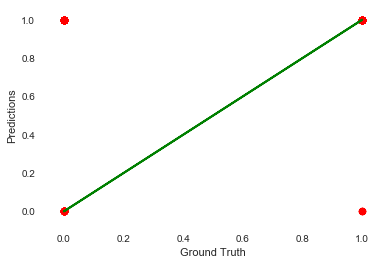

In [188]:
plt.scatter(y_test, predictions, color=['red'], alpha = 0.5)
plt.plot(y_test,y_test, color='green', linewidth=2)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();